In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Raw data
# data = {
#     'Label': ['Our (KZG)', 'Our (IPA)', 'Our (Holmes+Ped)', 'Cerebro', 'SHA3-256*', 'LowMCHash-256*', 'PVC*'],
#     'Time_(s)': ['0,7', '2,7', '61', '6255', '133.23', '60', '2,67'],
#     'Commitment_Size_(Bytes)': [48, 32, 4194304, 4194304, 32, 32, 1090000],
#     'Type': ['Com', 'Com', 'Com', 'Com', 'Hash', 'Hash', 'Hash'],
#     'Setting': ['WAN', 'WAN', 'WAN', 'WAN', 'LAN', 'LAN', 'LAN']
# }
data = {
    'Label': ['Ours (KZG)', 'Ours (IPA)', 'Cerebro+Holmes', 'Cerebro', 'SHA3-256', 'LowMCHash-256', 'PVC', 'Ours (KZG)', 'Ours (IPA)', 'Cerebro+Holmes', 'Cerebro'],
    'Time_(s)': ['5,9', '39', '6,1', '6255', '2200', '1100', '39,14', '3,9', '39', '4,1', '3000'],
    'Commitment_Size_(Bytes)': [48, 32, 4194304, 4194304, 32, 32, 1090000, 48, 32, 4194304, 4194304],
    'Type': ['Com', 'Com', 'Com', 'Com', 'Hash', 'Hash', 'Hash', 'Com', 'Com', 'Com', 'Com'],
    'Setting': ['WAN', 'WAN', 'WAN', 'WAN', 'LAN', 'LAN', 'LAN', 'LAN', 'LAN', 'LAN', 'LAN']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert Time to numerical format (replace commas with dots for float conversion)
df['Time_(s)'] = df['Time_(s)'].str.replace(',', '.').astype(float)

df


,Label,Time_(s),Commitment_Size_(Bytes),Type,Setting
0,Ours (KZG),5.90,48,Com,WAN
1,Ours (IPA),39.00,32,Com,WAN
2,Cerebro+Holmes,6.10,4194304,Com,WAN
3,Cerebro,6255.00,4194304,Com,WAN
4,SHA3-256,2200.00,32,Hash,LAN
5,LowMCHash-256,1100.00,32,Hash,LAN
6,PVC,39.14,1090000,Hash,LAN
7,Ours (KZG),3.90,48,Com,LAN
8,Ours (IPA),39.00,32,Com,LAN
9,Cerebro+Holmes,4.10,4194304,Com,LAN


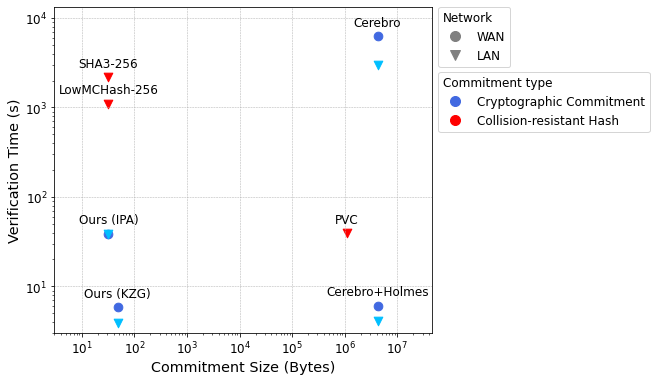

In [52]:
# Initialize the plot

COLOR_COM = 'royalblue'
COLOR_COM_LAN = 'deepskyblue'
COLOR_HASH = 'red'

plt.figure(figsize=(10, 6))

plt.rcParams.update({'font.size': 12, 'axes.labelsize': 'large', 'axes.titlesize': 'large'})

# Add grid for better readability
plt.grid(True, which="major", ls="--", linewidth=0.5)

# Create scatter plot
# plt.scatter(df['Commitment_Size_(Bytes)'], df['Time_(s)'], c='blue', marker='o', s=75)

# # Label each point
# for i, label in enumerate(df['Label']):
#     plt.annotate(label, (df['Commitment_Size_(Bytes)'][i], df['Time_(s)'][i]), textcoords="offset points", xytext=(0,10), ha='center')

# Iterate over rows to plot each point with specific marker and color
for index, row in df.iterrows():
    marker = 'o' if row['Setting'] == 'WAN' else 'v'  # Circle for WAN, square for LAN
    if row['Type'] == 'Com' and row['Setting'] == 'WAN':
        color = COLOR_COM
    elif row['Type'] == 'Com':
        color = COLOR_COM_LAN
    else:
        color = COLOR_HASH
#     color = COLOR_COM if row['Type'] == 'Com' else COLOR_HASH  # Blue for Com, red for Hash
    plt.scatter(row['Commitment_Size_(Bytes)'], row['Time_(s)'], c=color, marker=marker, s=75)
    if row['Type'] == 'Com' and row['Setting'] == 'LAN':
        pass
    else:
        plt.annotate(row['Label'], (row['Commitment_Size_(Bytes)'], row['Time_(s)']), textcoords="offset points", xytext=(0,10), ha='center')


# Add titles and labels
# plt.title('Comparison with Related Work')
plt.xlabel('Commitment Size (Bytes)')
plt.ylabel('Verification Time (s)')
plt.yscale('log')
plt.xscale('log')

# Extra margin on the x-axis
x_min, x_max = df['Commitment_Size_(Bytes)'].min(), df['Commitment_Size_(Bytes)'].max()
x_range = x_max - x_min
plt.xlim([3.0, x_max + 10 * x_range])

# Extra margin on the y-axis
y_min, y_max = df['Time_(s)'].min(), df['Time_(s)'].max()
y_range = y_max - y_min
plt.ylim([3.0, y_max + 7000])

# Create custom legend handles
# Create custom legend handles for marker types
circle_marker = mlines.Line2D([], [], color='gray', marker='o', linestyle='None', markersize=10, label='WAN')
square_marker = mlines.Line2D([], [], color='gray', marker='v', linestyle='None', markersize=10, label='LAN')

# Create custom legend handles for colors
com_color = mlines.Line2D([], [], color=COLOR_COM, marker='o', linestyle='None', markersize=10, label='Cryptographic Commitment')
hash_color = mlines.Line2D([], [], color=COLOR_HASH, marker='o', linestyle='None', markersize=10, label='Collision-resistant Hash')

ax = plt.gca()

# Create first legend and add it to the plot
first_legend = ax.legend(handles=[circle_marker, square_marker], title='Network', loc='upper left', bbox_to_anchor=(1, 1.02))
first_legend._legend_box.align = "left"
ax.add_artist(first_legend)

# Create second legend
second_legend = ax.legend(handles=[com_color, hash_color], title='Commitment type', loc='upper left', bbox_to_anchor=(1, 0.82))
second_legend._legend_box.align = "left"

plt.subplots_adjust(right=0.65)

# Show plot
# plt.show()
plt.savefig('plot2.pdf', format='pdf', dpi=300)
# plt.savefig('plot.png', dpi=300)

In [74]:
df = pd.read_csv('/Users/hidde/Documents/PhD/auditing/cryptographic-auditing-mpc/doe-suite-results/bench_consistency_1700164581/etl_results/extract_consistency/extract_consistency.csv')
display(df)
display(df.columns)
groupby_cols = ['run', 'host_idx']

timers = {
    "verification_time": ["Prove Verify"],
    "pp_time": ["Generating pp"],
    "commit_time": ["Generate commitments"]
}
stats = {
   "verification_time_s": { "cc_timer": ["Prove Verify"], "spdz": ["300"] }
#         player_bw_sent_bytes:
#           cc_stat: ["bytes_sent"]
#         player_bw_recv_bytes:
#           cc_stat: ["bytes_recv"]
#         global_data_sent_mb:
#           spdz: ["global_data_sent"]
}

# Initialize an empty DataFrame to store results
result = pd.DataFrame()

# Iterate over each category in self.stats
for category, stat_dict in stats.items():
    for key, columns in stat_dict.items():
        # Create a temporary DataFrame to store the sum for this category and key
        temp_df = df[columns].sum(axis=1).to_frame(name=f'{category}_{key}')
        # Add the groupby_columns to the temporary DataFrame for grouping
        temp_df[groupby_columns] = df[groupby_columns]
        # Group by groupby_columns and sum the values
        temp_df = temp_df.groupby(groupby_columns).sum().reset_index()
        # Merge with the result DataFrame
        if result.empty:
            result = temp_df
        else:
            result = result.merge(temp_df, on=groupby_columns, how='outer')


result

,Unnamed: 0,suite_name,suite_id,exp_name,run,rep,host_type,host_idx,factor_columns,source_file,...,mpc.player_0_hostname,mpc.player_count,mpc.protocol_setup,mpc.script_args.n_input_parties,mpc.script_args.n_samples,mpc.script_name,mpc.stage,stat,stat_value,player_number
0,0,bench_consistency,last,compare_pvc_lan,5,0,consistency,0,"['consistency_args.pc', 'mpc.stage']",stderr.log,...,ip-10-100-0-118.eu-central-1.compute.internal,2,lowgear-party,2,2097152,test_sz,run,spdz_timer_-1,105.34700,-1.0
1,1,bench_consistency,last,compare_pvc_lan,5,0,consistency,0,"['consistency_args.pc', 'mpc.stage']",stderr.log,...,ip-10-100-0-118.eu-central-1.compute.internal,2,lowgear-party,2,2097152,test_sz,run,spdz_timer_200,50.17900,-1.0
2,2,bench_consistency,last,compare_pvc_lan,5,0,consistency,0,"['consistency_args.pc', 'mpc.stage']",stderr.log,...,ip-10-100-0-118.eu-central-1.compute.internal,2,lowgear-party,2,2097152,test_sz,run,spdz_timer_201,49.76300,-1.0
3,3,bench_consistency,last,compare_pvc_lan,5,0,consistency,0,"['consistency_args.pc', 'mpc.stage']",stderr.log,...,ip-10-100-0-118.eu-central-1.compute.internal,2,lowgear-party,2,2097152,test_sz,run,spdz_timer_300,2.69802,-1.0
4,4,bench_consistency,last,compare_pvc_lan,5,0,consistency,0,"['consistency_args.pc', 'mpc.stage']",stderr.log,...,ip-10-100-0-118.eu-central-1.compute.internal,2,lowgear-party,2,2097152,test_sz,run,spdz_timer_301,2.70556,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,169,bench_consistency,last,compare_pvc_lan,1,0,consistency,1,"['consistency_args.pc', 'mpc.stage']",consistency_gen_commitments.log,...,ip-10-100-0-118.eu-central-1.compute.internal,2,lowgear-party,2,2097152,test_sz,run,cc_bytes_sent,50.00000,NaN
170,170,bench_consistency,last,compare_pvc_lan,1,0,consistency,1,"['consistency_args.pc', 'mpc.stage']",consistency_gen_commitments.log,...,ip-10-100-0-118.eu-central-1.compute.internal,2,lowgear-party,2,2097152,test_sz,run,cc_bytes_recv,50.00000,NaN
171,171,bench_consistency,last,compare_pvc_lan,1,0,consistency,1,"['consistency_args.pc', 'mpc.stage']",consistency_gen_commitments.log,...,ip-10-100-0-118.eu-central-1.compute.internal,2,lowgear-party,2,2097152,test_sz,run,cc_broadcasts,1.00000,NaN
172,172,bench_consistency,last,compare_pvc_lan,1,0,consistency,1,"['consistency_args.pc', 'mpc.stage']",consistency_gen_commitments.log,...,ip-10-100-0-118.eu-central-1.compute.internal,2,lowgear-party,2,2097152,test_sz,run,cc_to_king,1.00000,NaN


Index(['Unnamed: 0', 'suite_name', 'suite_id', 'exp_name', 'run', 'rep',
       'host_type', 'host_idx', 'factor_columns', 'source_file',
       '_python_path', '_python_pre', 'cmd_mpspdz', 'sleep_time',
       '$CMD$.consistency', 'consistency_args.abs_path_to_code_dir',
       'consistency_args.hosts_file', 'consistency_args.pc',
       'consistency_args.pp_args', 'consistency_args.prover_party',
       'mpc.abs_path_to_code_dir', 'mpc.compiler_args',
       'mpc.player_0_hostname', 'mpc.player_count', 'mpc.protocol_setup',
       'mpc.script_args.n_input_parties', 'mpc.script_args.n_samples',
       'mpc.script_name', 'mpc.stage', 'stat', 'stat_value', 'player_number'],
      dtype='object')

KeyError: "None of [Index(['Prove Verify'], dtype='object')] are in the [columns]"